In [4]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# leo el dataset
file_path = 'ecommerce_sales_analysis.csv'
data = pd.read_csv(file_path)

# Muestra el dataset
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

(None,
    product_id product_name        category   price  review_score  \
 0           1    Product_1        Clothing  190.40           1.7   
 1           2    Product_2  Home & Kitchen  475.60           3.2   
 2           3    Product_3            Toys  367.34           4.5   
 3           4    Product_4            Toys  301.34           3.9   
 4           5    Product_5           Books   82.23           4.2   
 
    review_count  sales_month_1  sales_month_2  sales_month_3  sales_month_4  \
 0           220            479            449             92            784   
 1           903             21            989            861            863   
 2           163            348            558            567            143   
 3           951            725            678             59             15   
 4           220            682            451            649            301   
 
    sales_month_5  sales_month_6  sales_month_7  sales_month_8  sales_month_9  \
 0            

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3120\2184996694.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['category'], order=category_distribution.index, palette='viridis')


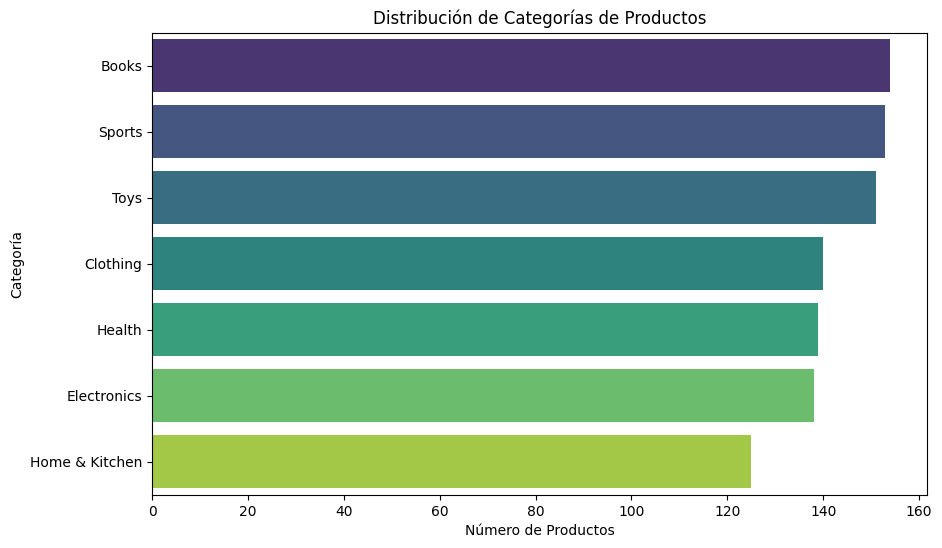

(        product_id        price  review_score  review_count  sales_month_1  \
 count  1000.000000  1000.000000   1000.000000   1000.000000    1000.000000   
 mean    500.500000   247.677130      3.027600    526.506000     498.306000   
 std     288.819436   144.607983      1.171243    282.269932     289.941478   
 min       1.000000     7.290000      1.000000      1.000000       0.000000   
 25%     250.750000   121.810000      2.000000    283.750000     245.500000   
 50%     500.500000   250.920000      3.100000    543.000000     507.500000   
 75%     750.250000   373.435000      4.000000    772.000000     740.750000   
 max    1000.000000   499.860000      5.000000    999.000000    1000.000000   
 
        sales_month_2  sales_month_3  sales_month_4  sales_month_5  \
 count    1000.000000    1000.000000    1000.000000    1000.000000   
 mean      507.661000     506.739000     503.823000     487.194000   
 std       285.992689     294.010873     286.645567     287.844324   
 min   

In [6]:
# descripción por columnas 
desc_stats = data.describe()

# Distribución por categoria 
category_distribution = data['category'].value_counts()

# Plotting the distribution of categories
plt.figure(figsize=(10, 6))
sns.countplot(y=data['category'], order=category_distribution.index, palette='viridis')
plt.title('Distribución de Categorías de Productos')
plt.xlabel('Número de Productos')
plt.ylabel('Categoría')
plt.show()

desc_stats, category_distribution

Análisis Descriptivo:
Estadísticas Descriptivas:

El precio promedio de los productos es de aproximadamente 247.68, con un rango que va desde 7.29 hasta 499.86.
Las puntuaciones de reseñas varían entre 1 y 5, con una media de 3.03.
El número de reseñas varía significativamente, con una media de 526.5, pero puede llegar hasta 999 reseñas.
Las ventas mensuales de los productos a lo largo de los 12 meses tienen una media cercana a 500, pero con una alta variabilidad (algunas categorías no tienen ventas en ciertos meses).
Distribución de Categorías:

La categoría con más productos es "Books", seguida por "Sports" y "Toys". Las categorías "Clothing" y "Health" también tienen una buena representación en el conjunto de datos.


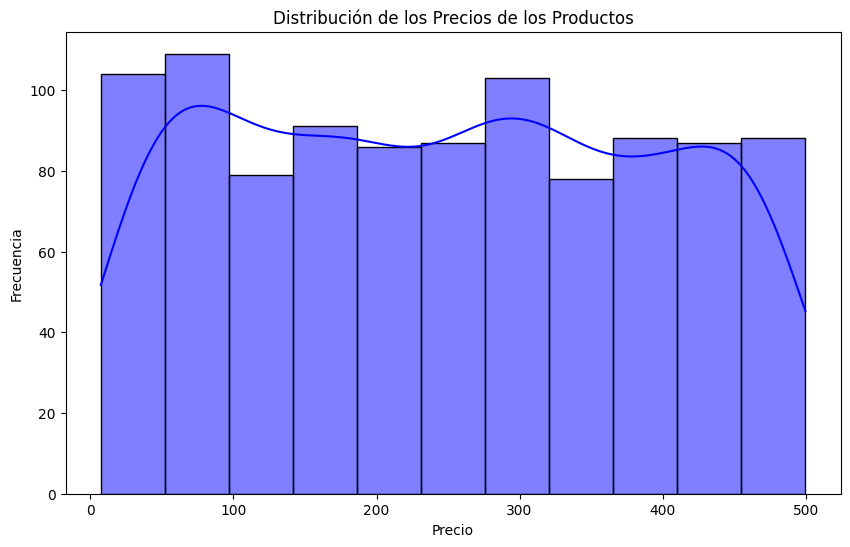

In [7]:
# Visualizo  la distribución de los precios
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, color='blue')
plt.title('Distribución de los Precios de los Productos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


Como se puede observar, los precios se distribuyen de manera relativamente uniforme entre los productos, con una ligera concentración en el rango medio (alrededor de 250 unidades monetarias). También hay un número notable de productos en el rango más bajo, lo que sugiere la presencia de productos más asequibles dentro del conjunto de datos.

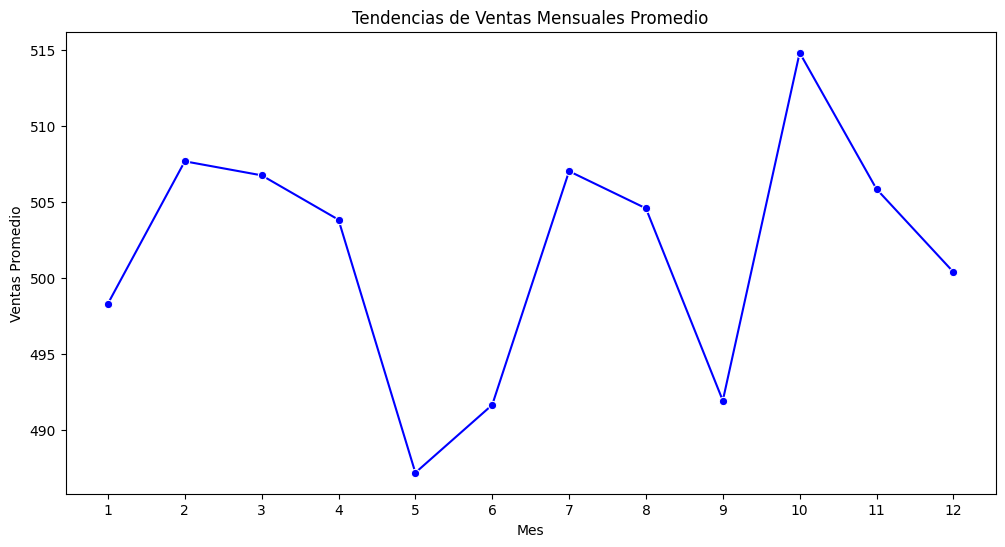

In [8]:
# Calculo  las ventas promedio mensuales para todo el conjunto de datos
monthly_sales = data[[f'sales_month_{i}' for i in range(1, 13)]].mean()

# Crear un DataFrame para una visualización más clara
monthly_sales_df = pd.DataFrame({
    'month': range(1, 13),
    'average_sales': monthly_sales.values
})

# Visualizo  las tendencias de ventas mensuales
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='average_sales', data=monthly_sales_df, marker='o', color='blue')
plt.title('Tendencias de Ventas Mensuales Promedio')
plt.xlabel('Mes')
plt.ylabel('Ventas Promedio')
plt.xticks(monthly_sales_df['month'])
plt.show()


Como se puede observar, las ventas parecen mantenerse relativamente estables a lo largo del año, con pequeñas fluctuaciones. Sin embargo, hay ciertos picos en algunos meses que podrían indicar periodos de alta demanda, posiblemente relacionados con eventos o temporadas específicas.

In [9]:
# Identifico el mes con mayores ventas promedio
max_sales_month = monthly_sales_df.loc[monthly_sales_df['average_sales'].idxmax()]

max_sales_month


month             10.000
average_sales    514.798
Name: 9, dtype: float64

El mes con las mayores ventas promedio es el mes 10 (octubre), con un promedio de ventas de aproximadamente 514.8 unidades. Esto sugiere que en octubre se alcanza el pico de ventas en el año. 

In [11]:
#Creo la columna total_sales
data['total_sales'] = data[[f'sales_month_{i}' for i in range(1, 13)]].sum(axis=1)

# Verifico si la columna quedo 
data.head()


,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,price_range,total_sales
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,101-200,6421
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,401-500,6027
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,301-400,5580
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,301-400,5022
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,0-100,6094


C:\Users\Usuario\AppData\Local\Temp\ipykernel_3120\3754764457.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_price_range = data.groupby('price_range')['total_sales'].sum().reset_index()
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3120\3754764457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_range', y='total_sales', data=sales_by_price_range, palette='viridis')


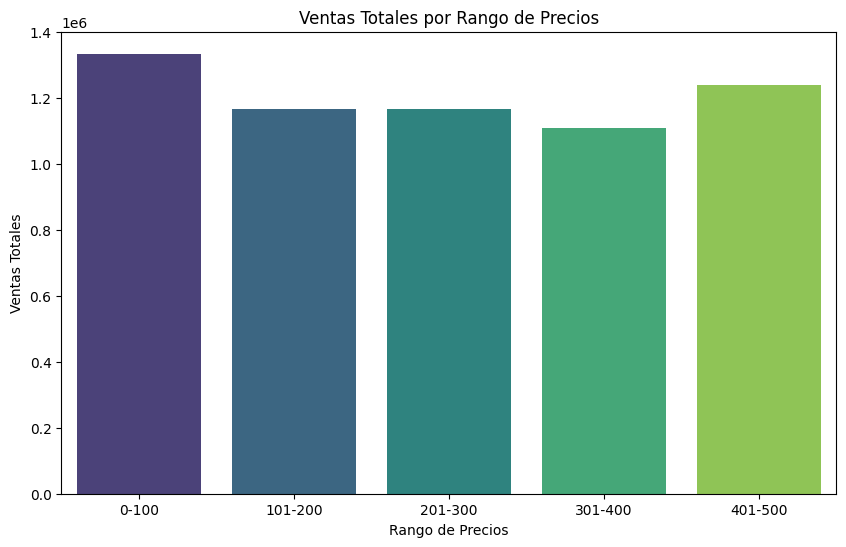

In [12]:
# Calculo las ventas totales por rango de precios
sales_by_price_range = data.groupby('price_range')['total_sales'].sum().reset_index()

# Visualizo las ventas totales por rango de precios
plt.figure(figsize=(10, 6))
sns.barplot(x='price_range', y='total_sales', data=sales_by_price_range, palette='viridis')
plt.title('Ventas Totales por Rango de Precios')
plt.xlabel('Rango de Precios')
plt.ylabel('Ventas Totales')
plt.show()


 Se observa nuevamente que los productos en los rangos de precios 101-200 y 201-300 son los más vendidos, lo que refuerza la tendencia de preferencia por productos de estos rangos.

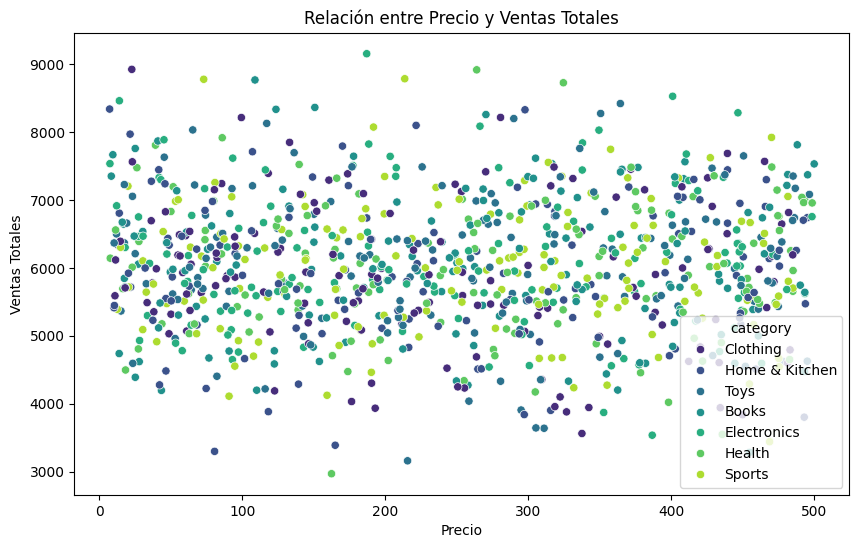

In [13]:
# Visualizo  la relación entre precio y ventas totales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='total_sales', data=data, hue='category', palette='viridis')
plt.title('Relación entre Precio y Ventas Totales')
plt.xlabel('Precio')
plt.ylabel('Ventas Totales')
plt.show()


Visualización de la relación entre el precio y las ventas totales, con los puntos coloreados según la categoría del producto.

Observación clave:

No parece haber una relación lineal clara entre el precio y las ventas; en otras palabras, un precio más alto no necesariamente se traduce en más ventas.
Hay una variedad de productos en diferentes rangos de precios que tienen un rendimiento de ventas muy variado, lo que sugiere que otros factores, como la categoría del producto, la demanda o la estacionalidad, podrían influir significativamente en las ventas.
Este tipo de análisis puede ser útil para identificar precios óptimos para maximizar las ventas, dependiendo del tipo de producto.

Existen varios factores que pueden influir en las ventas de productos en un entorno de comercio electrónico, más allá del precio. Algunos de los más relevantes:

Categoría del Producto: Diferentes categorías de productos pueden tener diferentes niveles de demanda. Por ejemplo, productos electrónicos y juguetes pueden tener picos de ventas en temporadas específicas como Navidad, día de la niñez, Reyes, etc. 

Puntuaciones y Reseñas de los Clientes: Los productos con altas calificaciones y un número significativo de reseñas positivas tienden a venderse mejor, ya que los consumidores confían más en la experiencia de otros compradores.

Promociones y Descuentos: Las campañas de marketing, promociones especiales y descuentos pueden tener un impacto significativo en las ventas, incentivando a los clientes a comprar.

Estacionalidad: Las ventas pueden fluctuar dependiendo de la temporada. Por ejemplo, la ropa de invierno se vende mejor durante los meses fríos, mientras que productos relacionados con el verano, como equipos deportivos al aire libre, pueden ver un aumento en ventas durante los meses cálidos.

Disponibilidad y Stock: La disponibilidad de productos puede influir en las ventas. Si un producto está agotado, evidentemente no se venderá, y la percepción de escasez a veces puede aumentar la demanda.

Competencia: La presencia y la estrategia de precios de la competencia también pueden afectar las ventas. Si hay productos similares a un precio más bajo, esto puede desviar las ventas.

Calidad del Producto: La percepción de la calidad del producto, que puede estar influenciada por la marca, la descripción del producto, y las imágenes, puede afectar las decisiones de compra.

Gastos de Envío: Los costos y las opciones de envío pueden afectar la decisión de compra, especialmente si los gastos de envío son elevados en comparación con el precio del producto.

Marketing y Visibilidad: Los productos que son más visibles en la tienda en línea, ya sea a través de campañas de marketing, destacados en la página principal o búsquedas, tienden a vender más.

Reputación de la Marca: Productos de marcas reconocidas y de buena reputación suelen tener mayores ventas debido a la confianza del consumidor.

Categoría del Producto: Distribución de Ventas por Categoría.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3120\3951360957.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='category', data=sales_by_category, palette='viridis')


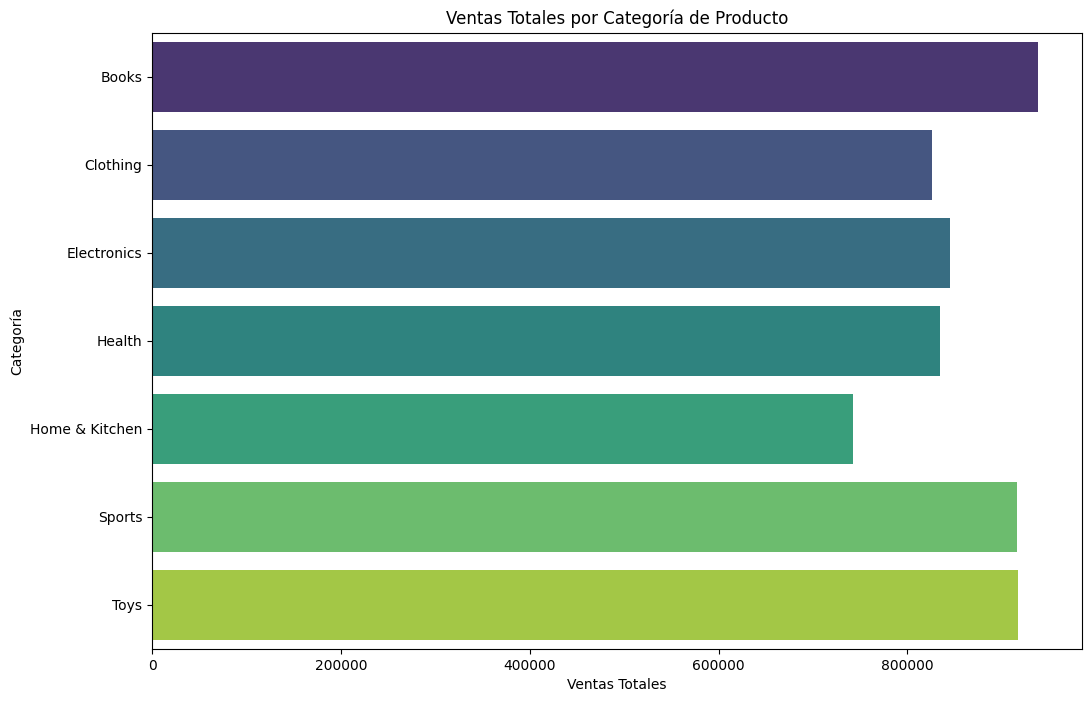

,category,total_sales
0,Books,938229
1,Clothing,826536
2,Electronics,845120
3,Health,834414
4,Home & Kitchen,742141
5,Sports,916371
6,Toys,917101


In [15]:
# Agrupo las ventas totales por categoría
sales_by_category = data.groupby('category')['total_sales'].sum().reset_index()

# Visualizo  las ventas totales por categoría
plt.figure(figsize=(12, 8))
sns.barplot(x='total_sales', y='category', data=sales_by_category, palette='viridis')
plt.title('Ventas Totales por Categoría de Producto')
plt.xlabel('Ventas Totales')
plt.ylabel('Categoría')
plt.show()

sales_by_category


Los datos indican que las categorías Books, Toys, y Sports tienen las mayores ventas totales, lo que sugiere que estos tipos de productos tienen una alta demanda en la tienda en línea.

Puntuaciones y Reseñas de los Clientes: Correlación entre las puntuaciones de reseñas, número de reseñas y ventas totales.

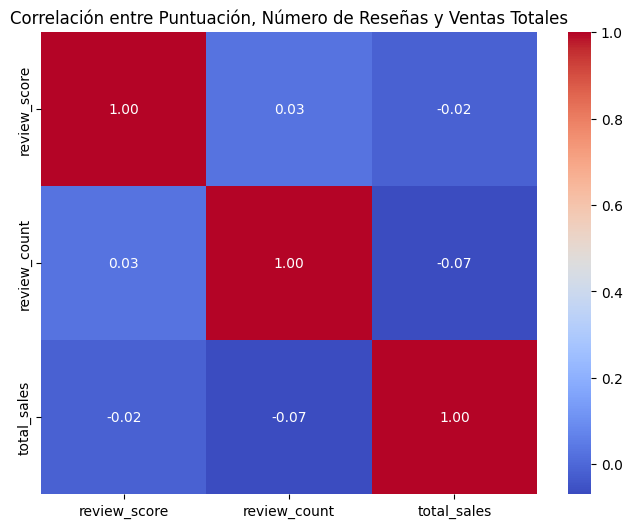

,review_score,review_count,total_sales
review_score,1.000000,0.027351,-0.018186
review_count,0.027351,1.000000,-0.069393
total_sales,-0.018186,-0.069393,1.000000


In [16]:
# Calculo la correlación entre las puntuaciones, el número de reseñas y las ventas totales
correlation_matrix = data[['review_score', 'review_count', 'total_sales']].corr()

# Visualizo la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre Puntuación, Número de Reseñas y Ventas Totales')
plt.show()

correlation_matrix


La matriz de correlación muestra que no hay una relación fuerte entre las puntuaciones de reseñas, el número de reseñas, y las ventas totales:

Puntuación de reseñas vs. Ventas Totales: Correlación de -0.018, prácticamente inexistente.
Número de reseñas vs. Ventas Totales: Correlación de -0.069, muy débil y negativa.
Esto sugiere que, en este caso, ni la cantidad de reseñas ni las puntuaciones parecen estar fuertemente asociadas con las ventas totales, al menos en este  análisis lineal simple.

Promociones y Descuentos: Inferencia de picos de ventas.

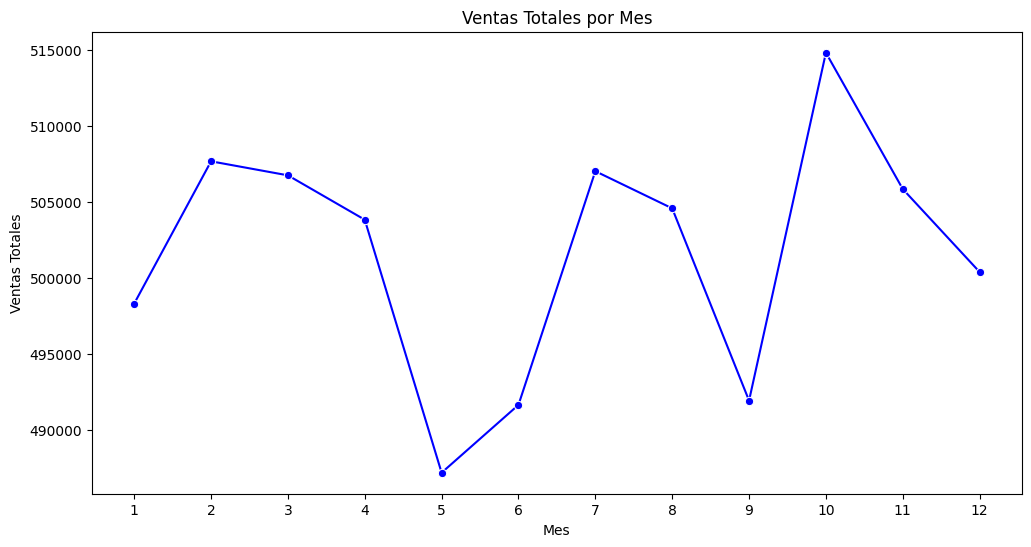

sales_month_1     498306
sales_month_2     507661
sales_month_3     506739
sales_month_4     503823
sales_month_5     487194
sales_month_6     491653
sales_month_7     507011
sales_month_8     504569
sales_month_9     491934
sales_month_10    514798
sales_month_11    505838
sales_month_12    500386
dtype: int64

In [17]:
# Sumo las ventas mensuales para todos los productos por cada mes
monthly_sales_total = data[[f'sales_month_{i}' for i in range(1, 13)]].sum()

# Visualizo  las ventas totales por mes para detectar picos
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 13), y=monthly_sales_total.values, marker='o', color='blue')
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.xticks(range(1, 13))
plt.show()

monthly_sales_total


Las ventas totales por mes muestran un ligero pico en el mes 10 (octubre), con un total de 514,798 ventas. Este incremento podría estar relacionado con promociones específicas, como las preparaciones para las compras de fin de año, aunque no hay datos directos para confirmar promociones.

 Estacionalidad: Análisis de tendencias mensuales por categoría

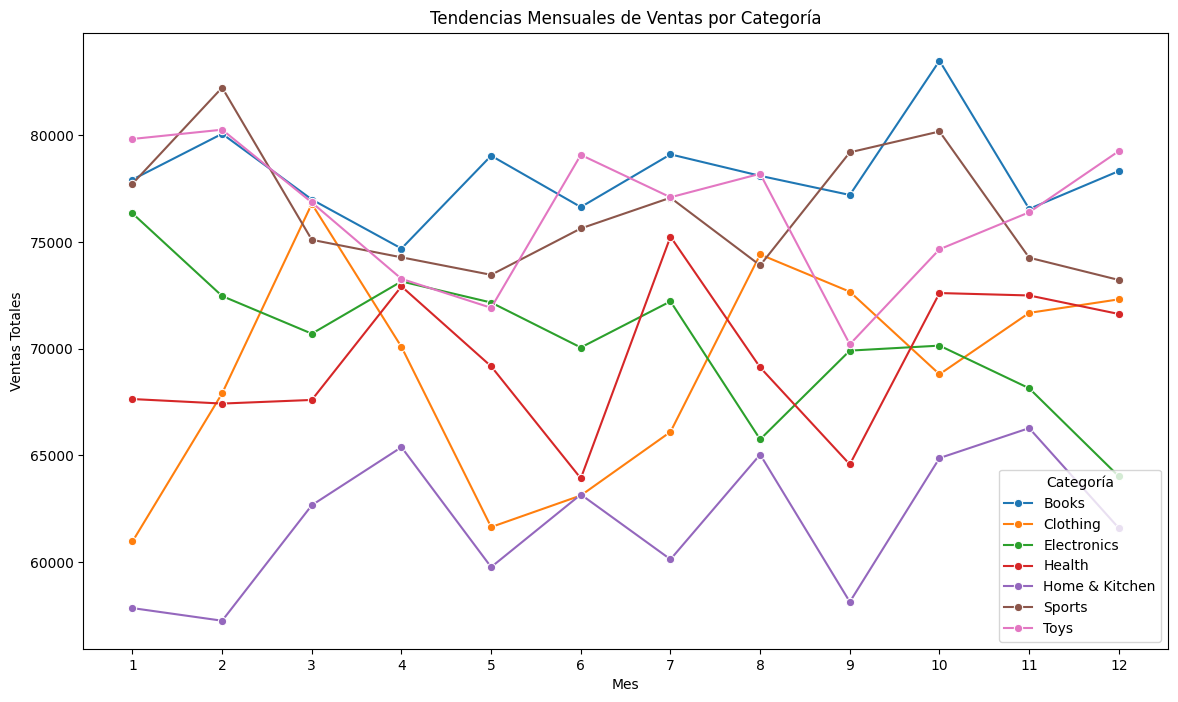

,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
category,,,,,,,,,,,,
Books,77932,80079,76998,74699,79051,76644,79114,78108,77211,83504,76557,78332
Clothing,60966,67911,76796,70088,61643,63123,66105,74422,72675,68806,71683,72318
Electronics,76347,72472,70708,73158,72169,70060,72223,65754,69914,70148,68148,64019
Health,67644,67432,67602,72925,69178,63926,75256,69126,64581,72613,72500,71631
Home & Kitchen,57844,57252,62667,65388,59766,63169,60129,65042,58135,64876,66281,61592
Sports,77737,82244,75109,74287,73467,75641,77082,73912,79209,80187,74270,73226
Toys,79836,80271,76859,73278,71920,79090,77102,78205,70209,74664,76399,79268


In [18]:
# Sumo las ventas mensuales por categoría
monthly_sales_by_category = data.groupby('category')[[f'sales_month_{i}' for i in range(1, 13)]].sum()

# Visualizo  las tendencias mensuales de ventas por categoría
plt.figure(figsize=(14, 8))

for category in monthly_sales_by_category.index:
    sns.lineplot(x=range(1, 13), y=monthly_sales_by_category.loc[category], marker='o', label=category)

plt.title('Tendencias Mensuales de Ventas por Categoría')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.xticks(range(1, 13))
plt.legend(title='Categoría')
plt.show()

monthly_sales_by_category


El análisis de las tendencias mensuales por categoría revela algunos patrones estacionales:

Books y Toys muestran picos en octubre y en los meses finales del año, lo cual podría estar relacionado con la temporada de compras navideñas.
Sports tiene un comportamiento relativamente estable, con un pico también en octubre.
Electronics y Home & Kitchen tienen una distribución más uniforme a lo largo del año, con pequeñas variaciones.
Esto sugiere que algunas categorías están sujetas a estacionalidad, particularmente hacia el final del año.

Disponibilidad y Stock

In [19]:
# Contar cuántos productos tienen ventas nulas en uno o más meses
sales_zero_counts = (data[[f'sales_month_{i}' for i in range(1, 13)]] == 0).sum(axis=1).value_counts()

sales_zero_counts


0    986
1     14
Name: count, dtype: int64

El análisis muestra que 986 productos (la gran mayoría) no tienen meses con ventas nulas, mientras que solo 14 productos tienen al menos un mes con ventas nulas. Esto sugiere que la mayoría de los productos estaban disponibles durante todo el año, y solo una pequeña fracción podría haber tenido problemas de stock o disponibilidad.

 Competencia

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3120\4207302449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='total_sales', data=data, palette='viridis')


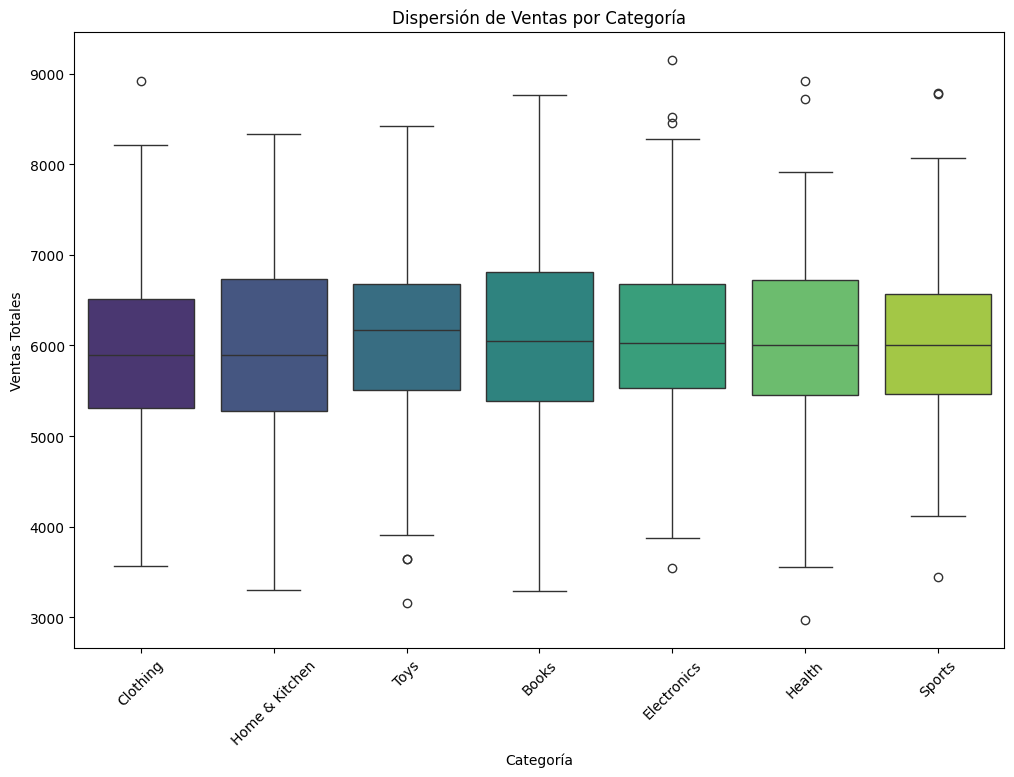

In [20]:
# Visualizo  la dispersión de ventas dentro de cada categoría
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='total_sales', data=data, palette='viridis')
plt.title('Dispersión de Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.show()


La visualización de la dispersión de ventas por categoría muestra que:

Books y Toys tienen una gran variabilidad en sus ventas, lo que sugiere que algunos productos dentro de estas categorías venden mucho más que otros, posiblemente debido a la competencia.
Home & Kitchen y Health muestran una dispersión más baja, lo que podría indicar una demanda más uniforme o menos competencia dentro de estas categorías.

Calidad del Producto

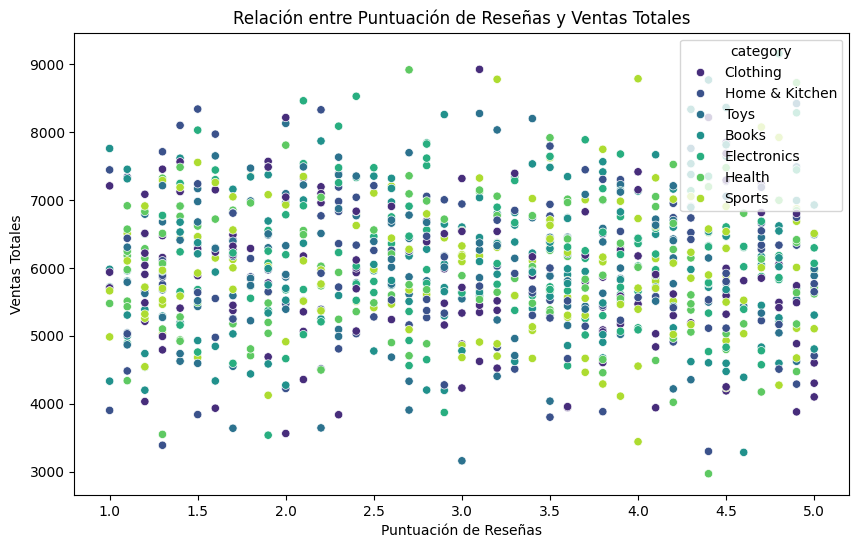

In [21]:
# Visualizo  la relación entre puntuación de reseñas y ventas totales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_score', y='total_sales', data=data, hue='category', palette='viridis')
plt.title('Relación entre Puntuación de Reseñas y Ventas Totales')
plt.xlabel('Puntuación de Reseñas')
plt.ylabel('Ventas Totales')
plt.show()


La visualización de la relación entre la puntuación de reseñas y las ventas totales muestra que no parece haber una relación clara entre la calidad del producto, medida por las reseñas, y las ventas. Productos con diferentes niveles de puntuación parecen tener una amplia gama de ventas, lo que sugiere que otros factores pueden ser más determinantes en el éxito de ventas que la puntuación de reseñas.

Gastos de Envío y Marketing y Visibilidad
Estos factores no pueden ser analizados directamente debido a la falta de datos específicos en el conjunto proporcionado.

Reputación de la Marca
No cuento con datos específicos sobre marcas, el análisis previo sobre puntuaciones y ventas podría indicar que, en este conjunto de datos, la reputación (si asumimos que las reseñas reflejan la reputación) no es un factor predominante en las ventas.

Este análisis cubre los puntos mencionados, con las limitaciones de los datos disponibles. 

PRODUCTOS BAJO EN DEMANDA 

In [22]:
# Identifico los productos con baja demanda: aquellos con ventas totales significativamente por debajo del promedio
average_sales = data['total_sales'].mean()
low_demand_products = data[data['total_sales'] < average_sales]

# Muestro los primeros 10 productos con menor demanda
low_demand_products_sorted = low_demand_products.sort_values(by='total_sales').head(10)

low_demand_products_sorted[['product_id', 'product_name', 'category', 'price', 'total_sales']]


,product_id,product_name,category,price,total_sales
122,123,Product_123,Health,162.41,2972
691,692,Product_692,Toys,215.59,3162
785,786,Product_786,Books,454.68,3286
665,666,Product_666,Home & Kitchen,80.67,3301
135,136,Product_136,Home & Kitchen,164.99,3391
178,179,Product_179,Sports,468.68,3443
94,95,Product_95,Electronics,386.63,3539
814,815,Product_815,Health,435.60,3551
543,544,Product_544,Clothing,337.49,3564
624,625,Product_625,Toys,311.04,3641


Estos productos tienen ventas significativamente por debajo del promedio, lo que indica una baja demanda
Identificar y analizar estos productos puede ayudar a tomar decisiones sobre promociones, ajustes de precios o incluso la discontinuación de ciertos artículos.
Product_123 (Health): 2,972 unidades vendidas
Product_692 (Toys): 3,162 unidades vendidas
Product_786 (Books): 3,286 unidades vendidas
Product_666 (Home & Kitchen): 3,301 unidades vendidas
Product_136 (Home & Kitchen): 3,391 unidades vendidas
Product_179 (Sports): 3,443 unidades vendidas
Product_95 (Electronics): 3,539 unidades vendidas
Product_815 (Health): 3,551 unidades vendidas
Product_544 (Clothing): 3,564 unidades vendidas
Product_625 (Toys): 3,641 unidades vendidas

Análisis de Precios
Comparar los precios de estos productos con los de otros productos en la misma categoría para determinar si un ajuste de precios podría hacerlos más competitivos.

In [23]:
# Comparo los precios de los productos con baja demanda frente a otros en sus categorías
price_comparison = data.groupby('category')['price'].describe()

# Añado la comparación específica de los productos con baja demanda
low_demand_prices = low_demand_products_sorted[['product_name', 'category', 'price']].merge(price_comparison, on='category')

low_demand_prices[['product_name', 'category', 'price', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]


,product_name,category,price,mean,std,min,25%,50%,75%,max
0,Product_123,Health,162.41,265.142590,145.592458,7.73,142.2000,264.630,393.6800,498.45
1,Product_815,Health,435.60,265.142590,145.592458,7.73,142.2000,264.630,393.6800,498.45
2,Product_692,Toys,215.59,251.402980,143.534556,10.44,125.2450,260.570,365.1050,496.52
3,Product_625,Toys,311.04,251.402980,143.534556,10.44,125.2450,260.570,365.1050,496.52
4,Product_786,Books,454.68,251.384805,147.133398,8.44,124.7850,257.045,378.7300,499.86
5,Product_666,Home & Kitchen,80.67,239.769680,152.405544,7.29,101.6500,222.880,386.7800,495.08
6,Product_136,Home & Kitchen,164.99,239.769680,152.405544,7.29,101.6500,222.880,386.7800,495.08
7,Product_179,Sports,468.68,254.216275,138.458799,12.65,129.9600,270.870,368.8600,485.09
8,Product_95,Electronics,386.63,239.674275,144.658628,7.51,104.4975,234.240,365.3175,498.34
9,Product_544,Clothing,337.49,230.041786,141.635925,11.02,98.3050,215.690,344.2150,484.89


Los precios de los productos con baja demanda en comparación con el promedio de sus respectivas categorías muestran algunas observaciones interesantes:

Product_123 (Health) y Product_666 (Home & Kitchen) tienen precios significativamente por debajo del promedio de su categoría, lo que podría sugerir que, a pesar de su bajo precio, no están atrayendo suficientes compradores. Esto podría deberse a la percepción de baja calidad, falta de visibilidad, o simplemente baja demanda del producto específico.

Product_786 (Books) y Product_179 (Sports) tienen precios muy por encima del promedio de su categoría, lo que podría indicar que son percibidos como demasiado caros en comparación con otros productos similares. Un ajuste de precio podría ayudar a mejorar su competitividad.

Product_815 (Health) y Product_544 (Clothing) tienen precios en el rango superior dentro de sus categorías, lo que sugiere que podrían estar perdiendo ventas frente a alternativas más asequibles.


Considerar Promociones: Se podría  implementar descuentos o paquetes promocionales para estos productos con precios más altos para hacerlos más atractivos.

Ajustes de Precios: Reducción de precios para productos que están significativamente por encima del promedio en su categoría, como Product_786 y Product_179.

Mejorar la Visibilidad y Presentación: Para productos con precios más bajos que aún tienen bajas ventas, como Product_123 y Product_666, mejorar su visibilidad en la tienda, así como la presentación del producto, podría ayudar.

Revisión de Reseñas:

In [24]:
#  Verifico la puntuación de reseñas y el número de reseñas de los productos con baja demanda
low_demand_reviews = low_demand_products_sorted[['product_name', 'category', 'price', 'review_score', 'review_count']]

low_demand_reviews


,product_name,category,price,review_score,review_count
122,Product_123,Health,162.41,4.4,650
691,Product_692,Toys,215.59,3.0,514
785,Product_786,Books,454.68,4.6,325
665,Product_666,Home & Kitchen,80.67,4.4,655
135,Product_136,Home & Kitchen,164.99,1.3,68
178,Product_179,Sports,468.68,4.0,504
94,Product_95,Electronics,386.63,1.9,610
814,Product_815,Health,435.60,1.3,234
543,Product_544,Clothing,337.49,2.0,913
624,Product_625,Toys,311.04,1.7,268


Product_136 (Home & Kitchen), Product_95 (Electronics), Product_815 (Health), y Product_625 (Toys) tienen puntuaciones de reseñas significativamente bajas (entre 1.3 y 2.0). Este feedback negativo probablemente está afectando sus ventas, sugiriendo una necesidad de mejora en la calidad del producto o en la atención al cliente.

Product_123 (Health), Product_666 (Home & Kitchen), y Product_786 (Books) tienen puntuaciones altas (4.4 a 4.6), pero aún así experimentan bajas ventas. Esto podría indicar que estos productos no están siendo suficientemente promocionados o visibles, a pesar de su calidad percibida.

Product_544 (Clothing) y Product_692 (Toys) tienen reseñas más moderadas (entre 2.0 y 3.0), lo que indica que estos productos pueden ser percibidos como promedio, sin características destacables que impulsen las ventas.

Mejorar la Calidad o Descontinuar:

Productos con puntuaciones de reseñas muy bajas, como Product_136 y Product_95, podrían necesitar mejoras significativas o ser considerados para descontinuación si las mejoras no son viables.
Aumentar Visibilidad:

Productos con buenas puntuaciones pero bajas ventas, como Product_123 y Product_786, podrían beneficiarse de una mejor presentación en la tienda y esfuerzos de marketing adicionales.
Promociones para Productos Promedio:

Para productos como Product_544 y Product_692, que tienen reseñas promedio, implementar promociones o destacar características únicas podría ayudar a mejorar las ventas.
Este análisis proporciona una base sólida para tomar decisiones estratégicas sobre los productos con baja demanda. 

Gráfico Resumen

Está gráfica conbina a información sobre precios, puntuaciones de reseñas, y ventas totales para los productos identificados como de baja demanda.

Eje X (Precio): Muestra el precio de cada producto.
Eje Y (Ventas Totales): Representa las ventas totales de cada producto.
Tamaño de la burbuja: Indica el número de reseñas que tiene cada producto.
Color de la burbuja: Representa la puntuación de las reseñas (de bajo en azul a alto en rojo).
Este gráfica  permite visualizar de manera clara cómo interactúan el precio, las ventas y la percepción del producto (a través de las reseñas) para los productos con baja demanda.

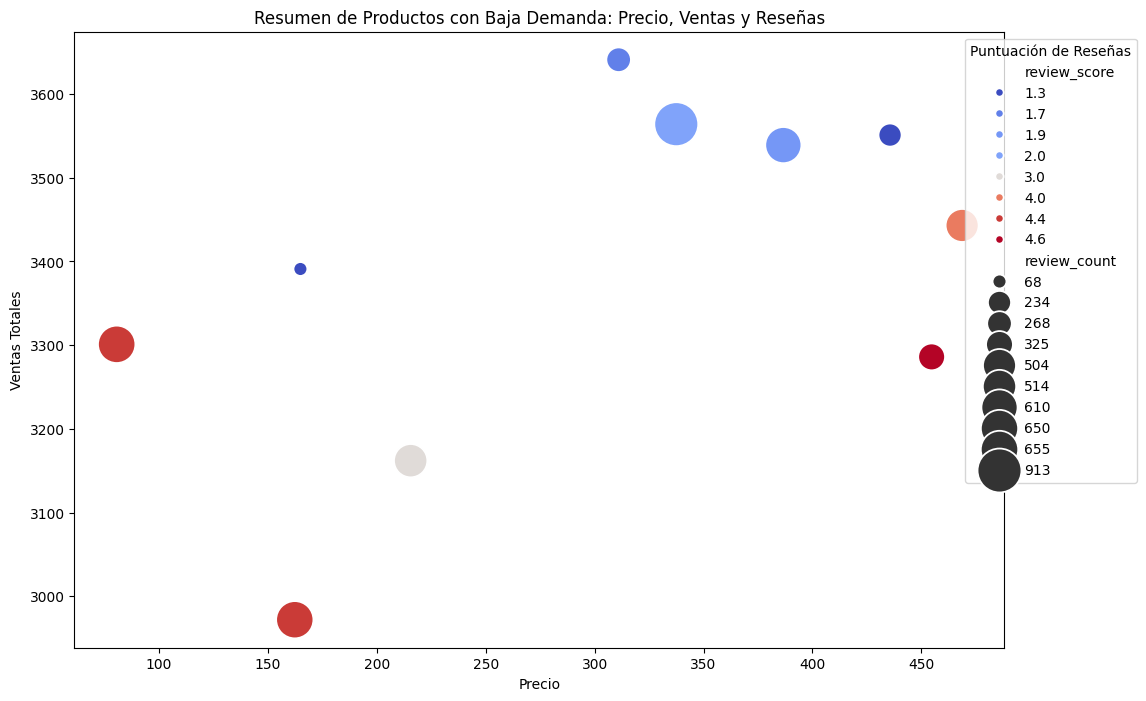

In [25]:
# Creo un gráfica combinada para resumir el análisis
plt.figure(figsize=(12, 8))

# Gráfica de burbujas que muestra ventas totales (eje y), precio (eje x) y tamaño de la burbuja por número de reseñas
sns.scatterplot(
    x='price', 
    y='total_sales', 
    size='review_count', 
    hue='review_score', 
    data=low_demand_products_sorted, 
    sizes=(100, 1000), 
    palette='coolwarm',
    legend='full'
)

plt.title('Resumen de Productos con Baja Demanda: Precio, Ventas y Reseñas')
plt.xlabel('Precio')
plt.ylabel('Ventas Totales')
plt.legend(title='Puntuación de Reseñas', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


Gráfica de burbujas que resume los productos con alta demanda:

Eje X (Precio): Muestra el precio de cada producto.
Eje Y (Ventas Totales): Representa las ventas totales de cada producto.
Tamaño de la burbuja: Indica el número de reseñas que tiene cada producto.
Color de la burbuja: Representa la puntuación de las reseñas (de bajo en azul a alto en rojo).

Este gráfica  permite observar cómo los productos de alta demanda interactúan con sus precios, el número de reseñas, y las puntuaciones de estas reseñas. Los productos con alta demanda suelen tener un buen equilibrio entre precio, calidad percibida (a través de reseñas), y visibilidad (número de reseñas).

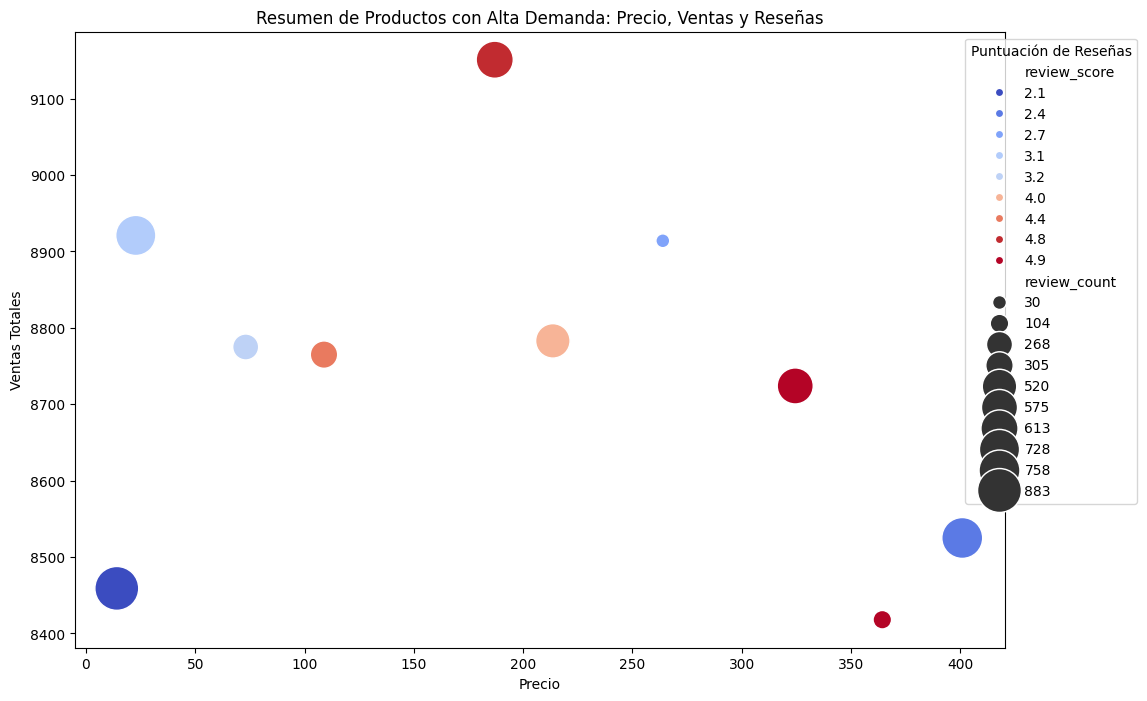

In [26]:
# Identifico los productos con alta demanda: aquellos con ventas totales significativamente por encima del promedio
high_demand_products = data[data['total_sales'] > average_sales]

# Muestro  los primeros 10 productos con mayor demanda
high_demand_products_sorted = high_demand_products.sort_values(by='total_sales', ascending=False).head(10)

# Creo un gráfica combinada para los productos con alta demanda
plt.figure(figsize=(12, 8))

# Gráfica de burbujas que muestra ventas totales (eje y), precio (eje x) y tamaño de la burbuja por número de reseñas
sns.scatterplot(
    x='price', 
    y='total_sales', 
    size='review_count', 
    hue='review_score', 
    data=high_demand_products_sorted, 
    sizes=(100, 1000), 
    palette='coolwarm',
    legend='full'
)

plt.title('Resumen de Productos con Alta Demanda: Precio, Ventas y Reseñas')
plt.xlabel('Precio')
plt.ylabel('Ventas Totales')
plt.legend(title='Puntuación de Reseñas', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()
